## Importing Required Packages

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


## Setting up data extractor

In [2]:
def get_files(path):
    file_list = []
    for path, directories, files in os.walk(path):
        file_list = files
        return file_list

In [3]:
img_raw = cv2.imread(f'COVID19_Lung_CT/CT_COVID/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%0.png',0)
print(img_raw.shape)
a = np.array(img_raw).flatten()
print(a.shape)


(335, 580)
(194300,)


## Extracting COVID-19 data, normalizing & then adding to dataframe

In [4]:
c_path = "./COVID19_Lung_CT/CT_COVID"
c_files = get_files(c_path)
c_data = []


for img in c_files:
    img_raw = cv2.imread(f'{c_path}/{img}',1)
    try:
        img_norm = cv2.resize(img_raw,(50,50)) # This needs to be improved with effective feature extraction
        img_flat = np.array(img_norm).flatten()
        c_data.append([img_flat,1]) # Assigning label 1 for COVID data
    except AssertionError: # Using try except clause makes sure we don't have any images which would not resize properly
        pass
        
print(len(c_data))

349


In [5]:
#pd.set_option("max_rows", None)
df = pd.DataFrame(c_data, columns = ['img_data', 'label'])
df

,img_data,label
0,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",1
1,"[6, 8, 8, 6, 8, 9, 5, 7, 8, 8, 7, 9, 9, 8, 10,...",1
2,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 89, 89, 8...",1
3,"[1, 1, 1, 6, 6, 6, 59, 59, 59, 65, 65, 65, 69,...",1
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
...,...,...
344,"[50, 50, 50, 51, 51, 51, 52, 52, 52, 52, 52, 5...",1
345,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",1
346,"[0, 0, 0, 76, 76, 76, 76, 76, 76, 79, 79, 79, ...",1
347,"[236, 236, 236, 237, 237, 237, 237, 237, 237, ...",1


TypeError: Invalid shape (7500,) for image data

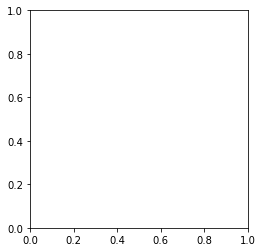

In [6]:
plt.imshow(df['img_data'][0])

In [7]:
df.shape

(349, 2)

In [ ]:
a = df['img_data'][0].flatten()
a.shape

## Extracting Non COVID-19 data, normalizing & then adding to dataframe

In [8]:
nc_path = "./COVID19_Lung_CT/CT_NonCOVID"
nc_files = get_files(nc_path)
nc_data = []

for img in nc_files:
    img_raw = cv2.imread(f'{nc_path}/{img}',1)
    try:
        img_norm = cv2.resize(img_raw,(50,50))
        img_flat = np.array(img_norm).flatten()
        nc_data.append([img_flat,0])
    except AssertionError:
        pass
    
print(len(nc_data))

397


In [9]:
df2 = pd.DataFrame(nc_data, columns = ['img_data', 'label'])
df2

,img_data,label
0,"[70, 70, 70, 63, 63, 63, 68, 68, 68, 66, 66, 6...",0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
2,"[18, 18, 18, 20, 20, 20, 19, 19, 19, 19, 19, 1...",0
3,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...",0
4,"[3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0
...,...,...
392,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0
393,"[84, 84, 84, 90, 90, 90, 83, 83, 83, 118, 118,...",0
394,"[214, 219, 224, 207, 210, 215, 225, 229, 234, ...",0
395,"[42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 4...",0


In [ ]:
plt.imshow(df2['img_data'][0])

### Merging data frames

In [10]:
img_master = df.append(df2, ignore_index=True)
img_master

,img_data,label
0,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",1
1,"[6, 8, 8, 6, 8, 9, 5, 7, 8, 8, 7, 9, 9, 8, 10,...",1
2,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 89, 89, 8...",1
3,"[1, 1, 1, 6, 6, 6, 59, 59, 59, 65, 65, 65, 69,...",1
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
...,...,...
741,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0
742,"[84, 84, 84, 90, 90, 90, 83, 83, 83, 118, 118,...",0
743,"[214, 219, 224, 207, 210, 215, 225, 229, 234, ...",0
744,"[42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 4...",0


In [11]:
img_final = img_master.sample(frac=1).reset_index(drop=True) #Shuffling dataframe and resetting index values
img_final

,img_data,label
0,"[0, 0, 0, 24, 24, 24, 25, 25, 25, 27, 27, 27, ...",1
1,"[60, 60, 60, 61, 61, 61, 60, 60, 60, 93, 93, 9...",0
2,"[1, 1, 1, 1, 1, 1, 92, 92, 92, 91, 91, 91, 91,...",0
3,"[30, 30, 30, 29, 29, 29, 28, 28, 28, 29, 29, 2...",1
4,"[40, 40, 40, 47, 47, 47, 41, 41, 41, 39, 39, 3...",1
...,...,...
741,"[58, 58, 58, 59, 59, 59, 61, 61, 61, 59, 59, 5...",1
742,"[210, 210, 210, 209, 209, 209, 206, 206, 206, ...",1
743,"[41, 41, 41, 49, 49, 49, 40, 40, 40, 230, 230,...",1
744,"[50, 50, 50, 48, 48, 48, 49, 49, 49, 50, 50, 5...",0


In [ ]:
plt.imshow(img_final['img_data'][0])

### Applying feature extraction layer

### Training & Testing Split

In [12]:
y_df = img_final[['label']]
X_df = img_final[['img_data']]


In [13]:
X = np.asarray(X_df)
y = np.asarray(y_df)
y = y.flatten()

In [14]:
X_final = []
for i in X: # Just use reshape here instead
    for g in i:
        X_final.append(g)
    

In [15]:
X_f = np.array(X_final)

In [17]:
X_f.shape

(746, 7500)

In [18]:
y.shape

(746,)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
     X_f, y, random_state=600)

print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape  = {X_test.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'y_test.shape  = {y_test.shape}')

X_train.shape = (559, 7500)
X_test.shape  = (187, 7500)
y_train.shape = (559,)
y_test.shape  = (187,)


### Implementing SVM Model

In [ ]:
sv = SVC(C=1,kernel='poly',gamma = 'auto')

In [ ]:
sv.fit(X_train, y_train)

In [ ]:
predict = sv.predict(X_test)

In [ ]:
print(f'Model accuracy is {accuracy_score(y_test, predict)*100:.2f}%')

In [ ]:
predict

In [ ]:
y_test